# 0. Imports

In [159]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

In [5]:
DATA_DIR = '../data/'

In [7]:
prices_df = pd.read_csv(DATA_DIR + 'prices_data.csv')
sentiment_df = pd.read_csv(DATA_DIR + 'sentiments.csv')
tweets_count_df = pd.read_csv(DATA_DIR + 'tweets_counts.csv')

# 1. Filtering

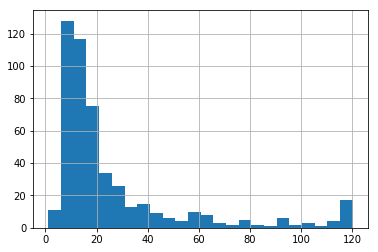

In [35]:
# Look at mean # of tweets per comapny
means = tweets_count_df.mean()
means.hist(bins=24)

In [56]:
# Chose companies with mean >= 100
companies = means[means>=100]
companies = companies.index.tolist()
companies

['UPS',
 'AMZN',
 'KIM',
 'EBAY',
 'ABC',
 'AAPL',
 'AAP',
 'ES',
 'FB',
 'CBS',
 'MAC',
 'TWTR',
 'F',
 'AMD',
 'MSFT',
 'EW',
 'GOOGL',
 'NFLX',
 'V',
 'NVDA',
 'IBM',
 'GS',
 'FOX',
 'GOOG',
 'AFL']

In [133]:
# calculate growth rates
prices_df[companies] = prices_df[companies].pct_change()/100
sentiment_df[companies] = sentiment_df[companies].pct_change()/100

# 2. Exploration
## 2.1 Prices

In [117]:
c1 = ['AMD', 'GOOG']  # sample companies 1
c2 = ['AMZN', 'EBAY']  # sample companies 2

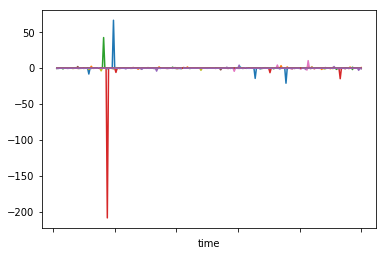

In [118]:
# plot return rates
prices_df.plot(x='time', y=companies, legend=False)

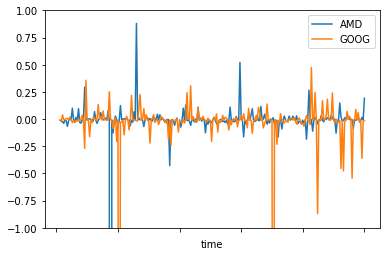

In [119]:
# zoom in
prices_df.plot(x='time', y=c1, ylim=(-1, 1))

## 2.2 Sentiment

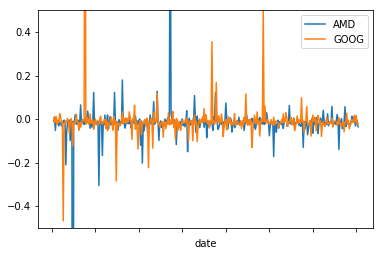

In [130]:
# plot sentiment growth rates
sentiment_df.plot(x='date', y=c1, ylim=(-0.5, 0.5))

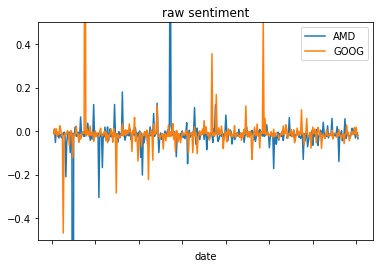

In [131]:
# plot some sentiment growth rates
sentiment_df.plot(x='date', y=c1, title='raw sentiment', ylim=(-0.5, 0.5))

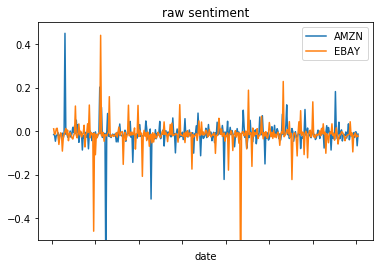

In [132]:
# plot some sentiment growth rates
sentiment_df.plot(x='date', y=c2, title='raw sentiment', ylim=(-0.5, 0.5))

# 3 Correlation matrices



## 3.1 Prices

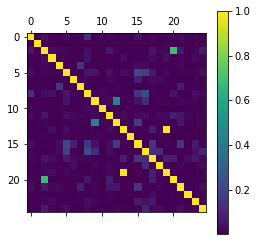

In [167]:
#absolute correlation matrix
prices_corr = prices_df[companies].corr()
plt.matshow(prices_corr.abs())
plt.colorbar()

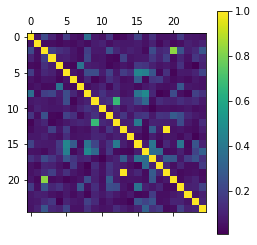

In [168]:
#'square root of absolute correlation matrix
plt.matshow(np.sqrt(prices_corr.abs()))
plt.colorbar()

## 3.2 Sentiments

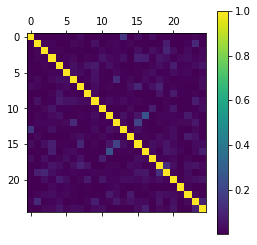

In [170]:
#absolute correlation matrix
sentiments_corr = sentiment_df[companies].corr()
plt.matshow(sentiments_corr.abs())
plt.colorbar()

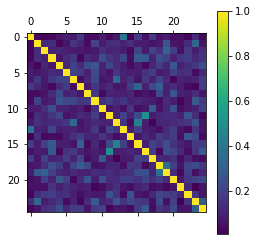

In [169]:
#square root of absolute correlation matrix
plt.matshow(np.sqrt(sentiments_corr.abs()))
plt.colorbar()